In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Линейная регрессия градиентный спуск своими руками

x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [3]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [4]:
x.shape, y.shape

((20,), (20,))

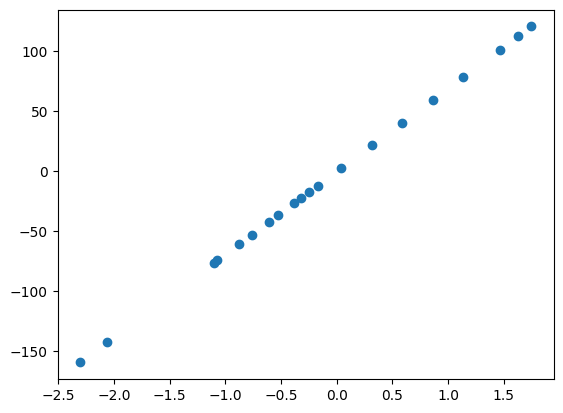

In [5]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [6]:
# Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму
# Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.
# Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

class Model(object):
    """Модель парной линейной регрессии y = b0 + b1 * x"""
    def __init__(self):
        self.b0 = 2 # Не зависит от начальных значений можем указывать любые
        self.b1 = 2
        
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, x, y):
        """J = y_pred - y_true"""
        return sum(((self.predict(x) - y)**2) / (2 * len(y)))
    
    def fit(self, x, y):
        alpha = 0.5 # Примерно после 1 начинает расходиться. И тоже не особо зависит при достаточном количестве шагов
        for _ in range(100):
            dJ0 = sum(self.predict(x) - y) /len(y)
            dJ1 = sum((self.predict(x) - y) * x) /len(y)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

In [7]:
model = Model()
print(model.predict(0))
print(model.predict(100))
print("Начальная ошибка:", model.error(x, y))

2
202
Начальная ошибка: 2790.184048800802


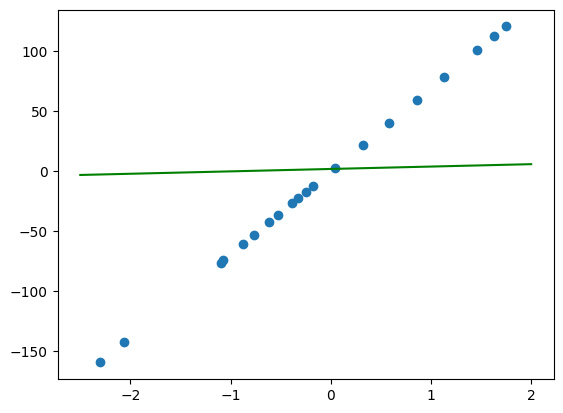

In [8]:
plt.figure()
plt.scatter(x, y)
x_pred = np.linspace(-2.5, 2, 100)
y_pred = model.predict(x_pred)
plt.plot(x_pred, y_pred, 'green')
plt.show()

In [9]:
model.fit(x, y)
print("Конечная ошибка:", model.error(x, y))

Конечная ошибка: 7.948266658167458e-29


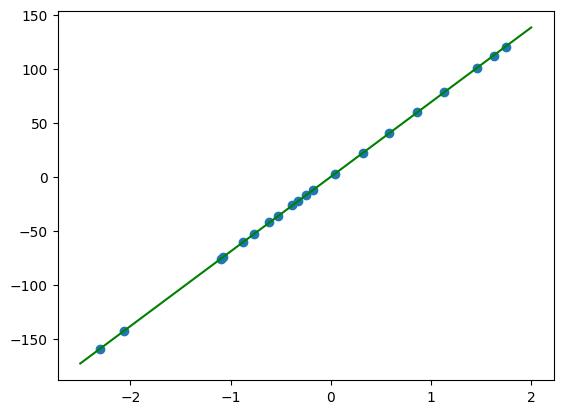

In [10]:
plt.figure()
plt.scatter(x, y)
x_pred = np.linspace(-2.5, 2, 100)
y_pred = model.predict(x_pred)
plt.plot(x_pred, y_pred, 'green')
plt.show()

In [11]:
# Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.
# Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.
# Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

class Model(object):
    """Модель парной линейной регрессии y = b0 + b1 * x"""
    def __init__(self, max_iter=50):
        self.b0 = 0      # Не зависит от начальных значений можем указывать любые
        self.b1 = 0
        self.max_iter = max_iter
        
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, x, y):
        """J = y_pred - y_true"""
        return sum(((self.predict(x) - y)**2) / (2 * len(y)))
    
    def fit(self, x, y):
        alpha = 0.1 # Примерно после 1 начинает расходиться. И тоже не особо зависит при достаточном количестве шагов
        errors = [self.error(x, y), ]
        for _ in range(self.max_iter):
            dJ0 = sum(self.predict(x) - y) /len(y)
            dJ1 = sum((self.predict(x) - y) * x) /len(y)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            
            # механизм адаптивной скорости обучения
            new_error = self.error(x, y)
            old_error = errors[-1]
            if new_error > old_error:
                alpha /= 2
                self.__init__()
            # ранняя остановка обучения
            if old_error - new_error < 0.00001: 
                break
            errors.append(new_error)
        else:
            print("Warning!")
        return errors

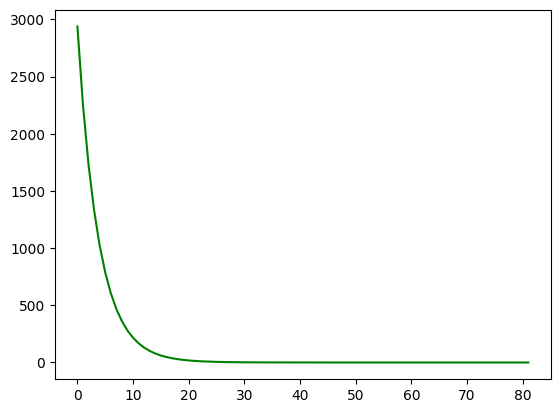

In [12]:
model = Model(max_iter=100)
errors = model.fit(x, y)
plt.plot(errors, 'g')

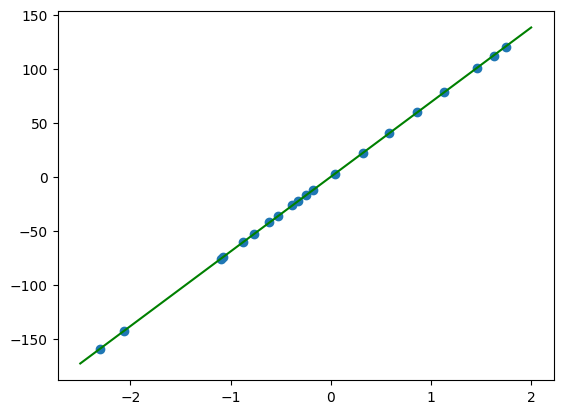

In [13]:
plt.figure()
plt.scatter(x, y)
x_pred = np.linspace(-2.5, 2, 100)
y_pred = model.predict(x_pred)
plt.plot(x_pred, y_pred, 'green')
plt.show()